In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function

$$f(w_1, w_2) = 0.1w_1^2 + 2w_2^2$$

# Exercise 1: Gradient Descent

In [ ]:
def df_w(w):
  return np.array((0.2 * w[0], 4 * w[1]))

In [ ]:
def update_w(w, lr):
  w = w - lr * df_w(w)
  return w

In [ ]:
def train(w, lr, epochs):
  results = [w]

  for epoch in range(epochs):
    w = update_w(w, lr)
    results.append(w)

  return results

In [ ]:
w = np.array([-5, -2], dtype=np.float32)
lr = 0.4

results = np.array(train(w, lr, epochs=30))

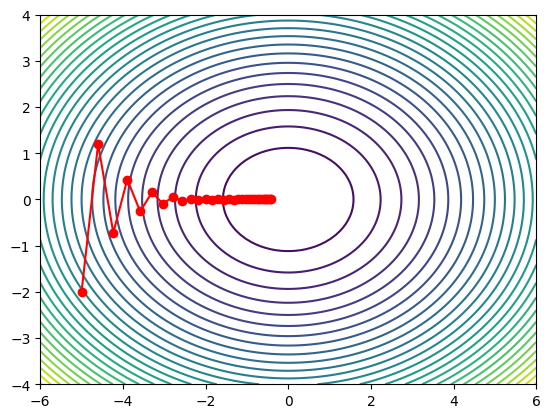

In [ ]:
# Plotting
w0_vals = np.linspace(-6, 6, 100)
w1_vals = np.linspace(-4, 4, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
Z = 0.1 * W0**2 + 0.2 * W1**2

plt.contour(W0, W1, Z, levels=30, cmap='viridis')
plt.plot(results[:, 0], results[:, 1], 'ro-')
plt.show()

# Exercise 2: Gradient Descent + Momentum

In [ ]:
def df_w(w):
  return np.array((0.2 * w[0], 4 * w[1]))

In [ ]:
def update_w(w, V, lr, beta):
  V = beta * V + (1 - beta) * df_w(w)
  w = w - lr * V

  return w, V

In [ ]:
def train(w, lr, beta, epochs):
  V = np.array([0, 0], dtype=np.float32)

  results = [w]

  for epoch in range(epochs):
    w, V = update_w(w, V, lr, beta)
    results.append(w)

  return results

In [ ]:
w = np.array([-5, -2], dtype=np.float32)

results = np.array(train(w, lr=0.6, beta=0.5, epochs=30))

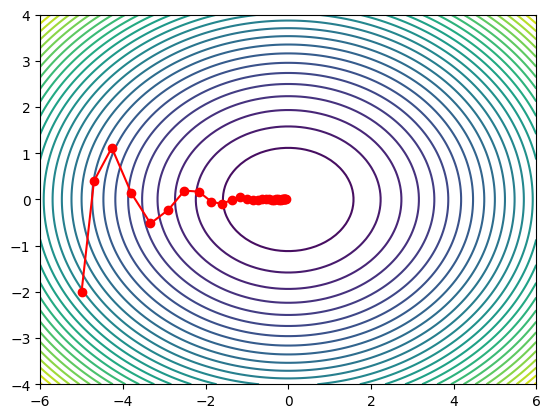

In [ ]:
# Plotting
w0_vals = np.linspace(-6, 6, 100)
w1_vals = np.linspace(-4, 4, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
Z = 0.1 * W0**2 + 0.2 * W1**2

plt.contour(W0, W1, Z, levels=30, cmap='viridis')
plt.plot(results[:, 0], results[:, 1], 'ro-')
plt.show()

# Exercise 3: RMSProp

In [ ]:
def df_w(w):
  return np.array([0.2 * w[0], 4 * w[1]])

In [ ]:
def update_w(w, S, lr, gamma, epsilon=1e-6):
  S = gamma * S + (1 - gamma) * df_w(w) ** 2
  w = w - lr * df_w(w) / np.sqrt(S + epsilon)

  return w, S

In [ ]:
def train(w, lr, gamma, epochs):
  S = np.array([0, 0], dtype=np.float32)

  results = [w]

  for epoch in range(epochs):
    w, S = update_w(w, S, lr, gamma)
    results.append(w)

  return results

In [ ]:
w = np.array([-5, -2], dtype=np.float32)

results = np.array(train(w, lr=0.3, gamma=0.9, epochs=30))

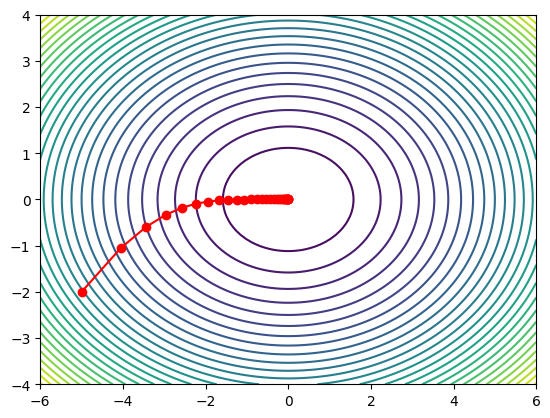

In [ ]:
# Plotting
w0_vals = np.linspace(-6, 6, 100)
w1_vals = np.linspace(-4, 4, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
Z = 0.1 * W0**2 + 0.2 * W1**2

plt.contour(W0, W1, Z, levels=30, cmap='viridis')
plt.plot(results[:, 0], results[:, 1], 'ro-')
plt.show()

# Exercise 4: Adam

In [ ]:
def df_w(w):
  return np.array([0.2 * w[0], 4 * w[1]])

In [ ]:
def update_w(w, V, S, lr, beta1, beta2, t, epsilon=1e-6):
  V = beta1 * V + (1 - beta1) * df_w(w)
  S = beta2 * S + (1 - beta2) * df_w(w) ** 2

  V_corr = V / (1 - beta1 ** t)
  S_corr = S / (1 - beta2 ** t)

  w = w - lr * V_corr / (np.sqrt(S_corr) + epsilon)

  return w, V, S

In [ ]:
def train(w, lr, beta1, beta2, epochs):
  V = np.array([0, 0], dtype=np.float32)
  S = np.array([0, 0], dtype=np.float32)

  results = [w]

  for epoch in range(epochs):
    w, V, S = update_w(w, V, S, lr, beta1, beta2, t=epoch+1)
    results.append(w)

  return results

In [ ]:
w = np.array([-5, -2], dtype=np.float32)

results = np.array(train(w, lr=0.2, beta1=0.9, beta2=0.999, epochs=30))

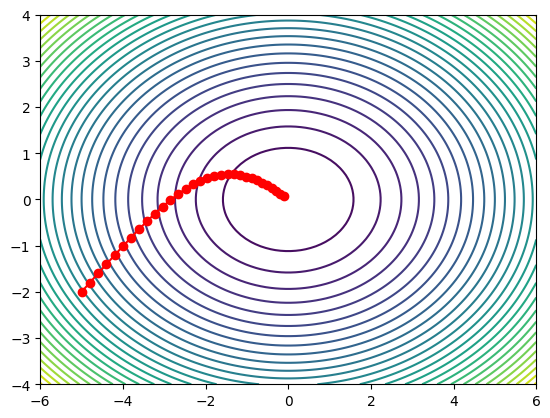

In [ ]:
# Plotting
w0_vals = np.linspace(-6, 6, 100)
w1_vals = np.linspace(-4, 4, 100)
W0, W1 = np.meshgrid(w0_vals, w1_vals)
Z = 0.1 * W0**2 + 0.2 * W1**2

plt.contour(W0, W1, Z, levels=30, cmap='viridis')
plt.plot(results[:, 0], results[:, 1], 'ro-')
plt.show()

# Exercise 5: Vanishing Problem

## Import Libraries

In [ ]:
!gdown 1y8xhCM_rVCgxOPSF3VtVkFxnwxtBlH0x

Downloading...
From (original): https://drive.google.com/uc?id=1y8xhCM_rVCgxOPSF3VtVkFxnwxtBlH0x
From (redirected): https://drive.google.com/uc?id=1y8xhCM_rVCgxOPSF3VtVkFxnwxtBlH0x&confirm=t&uuid=e4a125f3-9777-4cd7-8a75-c4a795e77268
To: /content/adopt.py
100% 18.3k/18.3k [00:00<00:00, 62.3MB/s]


In [ ]:
import torch
from torch import nn
from adopt import ADOPT
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import numpy as np

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

## Load Data

In [ ]:
batch_size = 512
num_epochs = 20
lr = 0.01

In [ ]:
train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)

test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size)

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 6.01MB/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 70.7MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.42MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



## Modeling

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dims, hidden_dims, output_dims):
    super().__init__()
    self.layer1 = nn.Linear(input_dims, hidden_dims)
    self.layer2 = nn.Linear(hidden_dims, hidden_dims)
    self.layer3 = nn.Linear(hidden_dims, hidden_dims)
    self.layer4 = nn.Linear(hidden_dims, hidden_dims)
    self.layer5 = nn.Linear(hidden_dims, hidden_dims)
    self.output = nn.Linear(hidden_dims, output_dims)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = nn.Flatten()(x)
    x = self.layer1(x)
    x = self.sigmoid(x)
    x = self.layer2(x)
    x = self.sigmoid(x)
    x = self.layer3(x)
    x = self.sigmoid(x)
    x = self.layer4(x)
    x = self.sigmoid(x)
    x = self.layer5(x)
    x = self.sigmoid(x)
    out = self.output(x)
    return out

## ADOPT Optimizer

link paper: https://arxiv.org/abs/2411.02853

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = ADOPT(model.parameters(), lr=lr)

## Train model

In [ ]:
train_losses = []
train_acc = []
val_losses = []
val_acc = []
for epoch in range(num_epochs):
    model.train()
    t_loss = 0
    t_acc = 0
    cnt = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        t_loss += loss.item()
        t_acc += (torch.argmax(outputs, 1) == y).sum().item()
        cnt += len(y)
    t_loss /= len(train_loader)
    train_losses.append(t_loss)
    t_acc /= cnt
    train_acc.append(t_acc)

    model.eval()
    v_loss = 0
    v_acc = 0
    cnt = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = criterion(outputs, y)
            v_loss += loss.item()
            v_acc += (torch.argmax(outputs, 1)==y).sum().item()
            cnt += len(y)
    v_loss /= len(test_loader)
    val_losses.append(v_loss)
    v_acc /= cnt
    val_acc.append(v_acc)
    print(f"Epoch {epoch+1}/{num_epochs}, Train_Loss: {t_loss:.4f}, Train_Acc: {t_acc:.4f}, Validation Loss: {v_loss:.4f}, Val_Acc: {v_acc:.4f}")

Epoch 1/20, Train_Loss: 2.3515, Train_Acc: 0.1012, Validation Loss: 2.3073, Val_Acc: 0.1000
Epoch 2/20, Train_Loss: 2.3061, Train_Acc: 0.1008, Validation Loss: 2.3051, Val_Acc: 0.1000
Epoch 3/20, Train_Loss: 2.3059, Train_Acc: 0.0976, Validation Loss: 2.3063, Val_Acc: 0.1000
Epoch 4/20, Train_Loss: 2.3058, Train_Acc: 0.0987, Validation Loss: 2.3052, Val_Acc: 0.1000
Epoch 5/20, Train_Loss: 2.3057, Train_Acc: 0.0993, Validation Loss: 2.3054, Val_Acc: 0.1000
Epoch 6/20, Train_Loss: 2.3059, Train_Acc: 0.0988, Validation Loss: 2.3036, Val_Acc: 0.1000
Epoch 7/20, Train_Loss: 2.3061, Train_Acc: 0.0981, Validation Loss: 2.3044, Val_Acc: 0.1000
Epoch 8/20, Train_Loss: 2.3055, Train_Acc: 0.0994, Validation Loss: 2.3049, Val_Acc: 0.1000
Epoch 9/20, Train_Loss: 2.3053, Train_Acc: 0.0971, Validation Loss: 2.3046, Val_Acc: 0.1000
Epoch 10/20, Train_Loss: 2.3053, Train_Acc: 0.1002, Validation Loss: 2.3048, Val_Acc: 0.1000
Epoch 11/20, Train_Loss: 2.3053, Train_Acc: 0.0998, Validation Loss: 2.3044, Va

## Plot

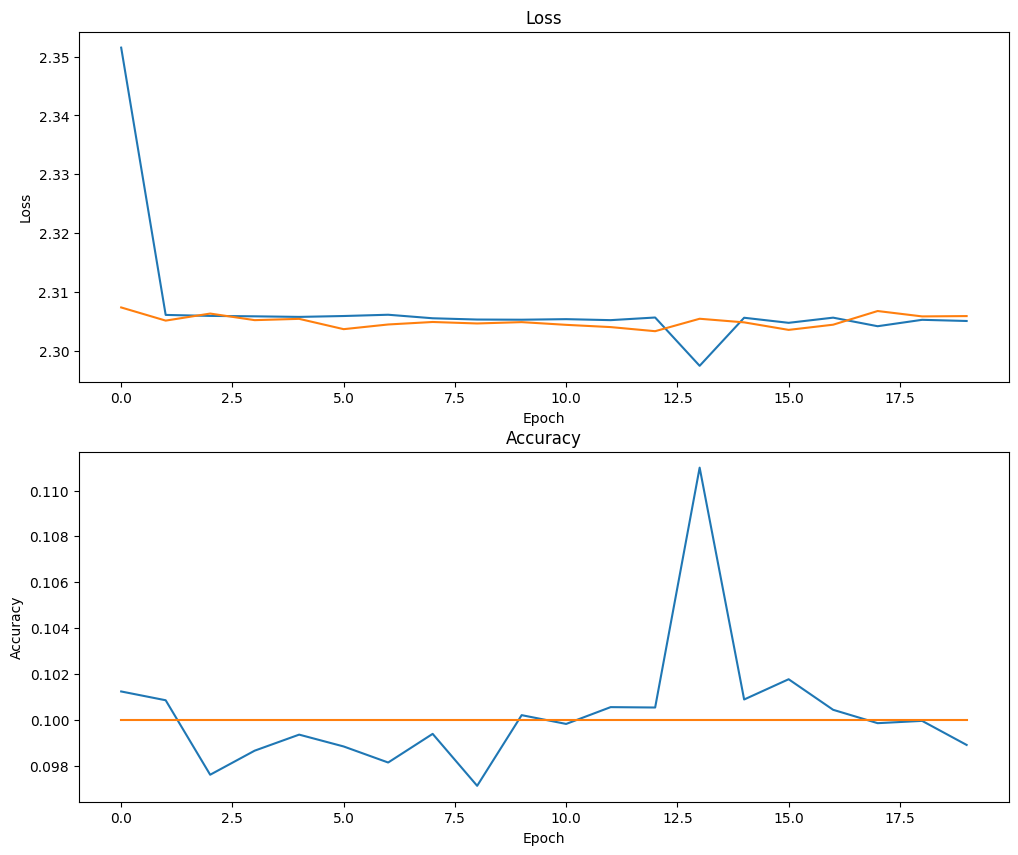

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].plot(train_losses, label='train_loss')
ax[0].plot(val_losses, label='val_loss')
ax[0].set(xlabel='Epoch', ylabel='Loss')
ax[0].set_title('Loss')

ax[1].plot(train_acc, label='train_acc')
ax[1].plot(val_acc, label='val_acc')
ax[1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1].set_title('Accuracy')

plt.show()